# Vidio Sentiment Analyzer : Unveiling User Sentiments in Google Play Reviews

`Vidio Sentiment Analyzer: Mengungkap Sentimen Pengguna dalam Ulasan Google Play` merupakan pendekatan inovatif untuk mengidentifikasi pola-pola utama dalam kumpulan ulasan pengguna. Di era informasi digital yang berkembang pesat seperti sekarang, sangat penting bagi Vidio sebagai platform terkemuka untuk mengetahui dan memahami isu-isu utama yang diungkapkan oleh pengguna.

`Sentiment Analyzer` menggunakan teknik canggih untuk memahami sentimen yang mendominasi dalam ulasan Google Play. Dengan volume feedback pengguna yang besar, menjadi sangat penting bagi Vidio untuk mendapatkan wawasan tentang sentimen pengguna.

Penerapan analisis sentimen memungkinkan Vidio mengkategorikan ulasan pengguna menjadi sentimen positif dan negatif memungkinkan pemahaman yang lebih mendalam tentang pengalaman dan preferensi pengguna. Metrik evaluasi yang relevan dapat mencakup distribusi polaritas sentimen, intensitas sentimen, dan tren sentimen dari waktu ke waktu.

Dalam konteks ini, metrik evaluasi kunci dapat melibatkan metrik-metrik standar analisis sentimen seperti akurasi, precision, recall, dan F1 Score. Metrik-metrik ini memberikan pandangan komprehensif tentang seberapa baik Sentiment Analyzer dalam mengklasifikasikan sentimen pengguna dengan akurat.

Wawasan yang diperoleh dari Sentiment Analyzer dapat memberdayakan Vidio untuk meningkatkan kepuasan pengguna, memprioritaskan perbaikan fitur, dan menanggapi masalah dengan cepat. Dengan fokus pada sentimen pengguna, Vidio dapat secara strategis menyelaraskan upayanya untuk memenuhi harapan pengguna dan menjaga pengalaman pengguna yang positif.

Melalui Vidio Sentiment Analyzer, Vidio dapat menavigasi lanskap dinamis opini pengguna di platform Google Play, memungkinkan pengambilan keputusan yang berbasis informasi dan langkah-langkah proaktif untuk meningkatkan kepuasan pengguna.

# Data Preparation

## Import Library

In [1]:
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import pycrfsuite 
# Download data NLTK
nltk.download('stopwords')
nltk.download('wordnet')
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tag import CRFTagger
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read Data

Data yang digunakan merupakan data yang diambil atau discrapping dari google play pada aplikasi Vidio mulai tanggal 2020-08-03 - 2023-12-20 sebanyak 10000 rows

In [6]:
# Read Data
df = pd.read_csv('dataset/data_preparation_vidio.csv')
# sanity check
df

,content,score,at,sentiment,event_date,event_hour,event_minute
0,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,1,2018-09-15 08:17:04,Negatif,2018-09-15,8,17
1,lumayan bagus tapi tolong di perbaiki gangguan...,5,2018-09-15 15:50:21,Positif,2018-09-15,15,50
2,Bagus banget Jadi bisa lihat TV dimn pun saat ...,5,2018-09-15 14:33:19,Positif,2018-09-15,14,33
3,"Masa tidak bisa tampilkan semua liga, kami mau...",1,2018-09-19 02:10:42,Negatif,2018-09-19,2,10
4,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",2,2018-09-20 09:13:09,Negatif,2018-09-20,9,13
...,...,...,...,...,...,...,...
9995,Aplikasi dari 2015 tapi film dan anime yang te...,1,2023-12-29 04:32:05,Negatif,2023-12-29,4,32
9996,Saya menyesal berlanggan vidio karena pembayar...,1,2023-12-29 20:19:22,Negatif,2023-12-29,20,19
9997,tolong apknya di update dong masa gak ada film...,1,2023-12-29 13:37:03,Negatif,2023-12-29,13,37
9998,masa nonton premier league vidionya lebih lamb...,1,2023-12-29 18:35:41,Negatif,2023-12-29,18,35


# Exploratory Data Analysis

### Distribusi Skor (Rating) Aplikasi Vidio

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


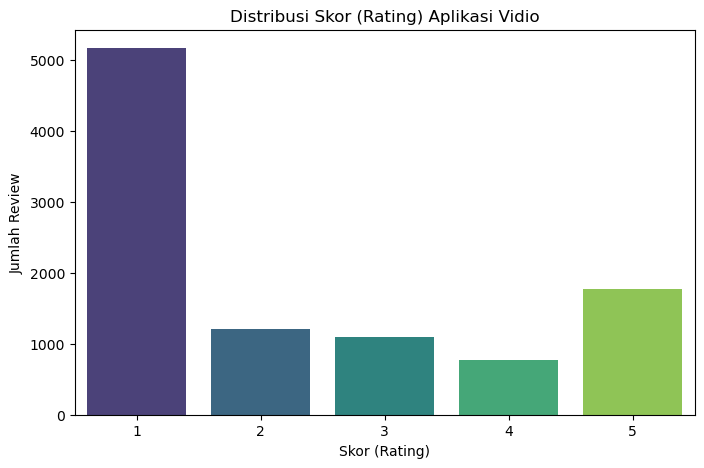

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Skor
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribusi Skor (Rating) Aplikasi Vidio')
plt.xlabel('Skor (Rating)')
plt.ylabel('Jumlah Review')
plt.show()

## Distribusi Sentimen Aplikasi Vidio

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


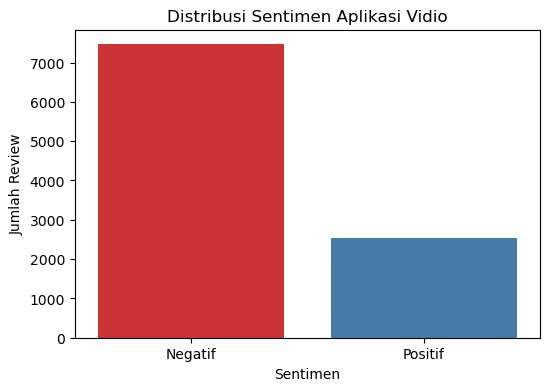

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Sentimen
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set1')
plt.title('Distribusi Sentimen Aplikasi Vidio')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.show()

### Tren Sentimen Aplikasi Vidio seiring Waktu

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

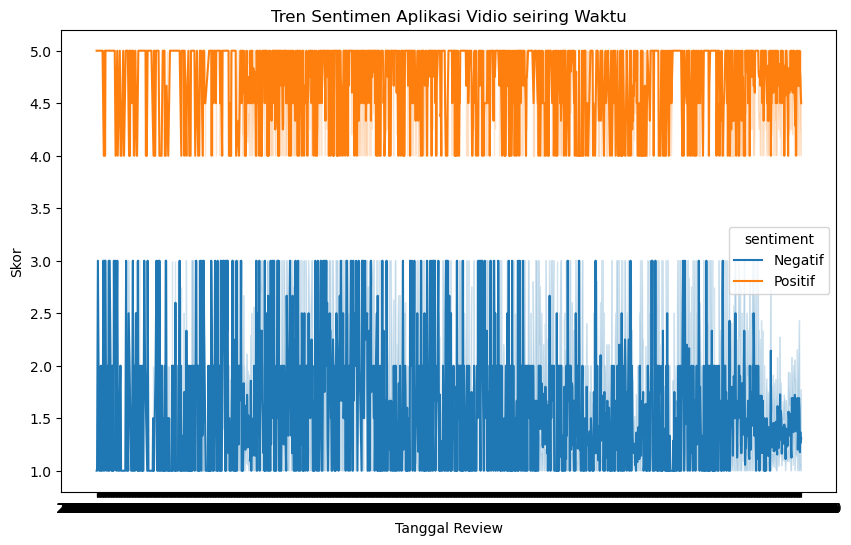

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tren Sentimen seiring Waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='event_date', y='score', hue='sentiment', data=df)
plt.title('Tren Sentimen Aplikasi Vidio seiring Waktu')
plt.xlabel('Tanggal Review')
plt.ylabel('Skor')
plt.show()

## Distribusi Panjang Kata pada Ulasan

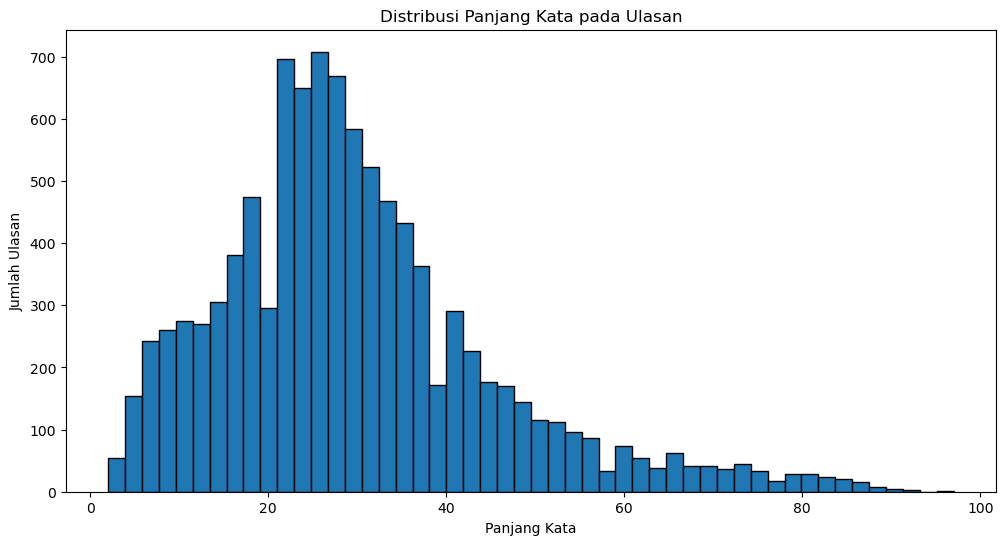

In [10]:
import matplotlib.pyplot as plt

# Menghitung panjang kata pada setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Membuat histogram distribusi panjang kata
plt.figure(figsize=(12, 6))
plt.hist(df['word_count'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Ulasan')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah Ulasan')
plt.show()

### Cek Panjang Kata Ulasan

In [11]:
# Menambahkan kolom 'word_count' yang berisi jumlah kata dalam setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Mencetak jumlah kata minimal dan maksimal
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()

print(f"Jumlah kata minimal: {min_word_count}")
print(f"Jumlah kata maksimal: {max_word_count}")

Jumlah kata minimal: 2
Jumlah kata maksimal: 97


In [12]:
# Menambahkan kolom 'word_count' yang berisi jumlah kata dalam setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Memfilter baris yang memiliki jumlah kata antara 2 dan 10
filtered_rows = df[(df['word_count'] >= 2) & (df['word_count'] <= 5)]

In [13]:
# Sanity Check
filtered_rows

,content,score,at,sentiment,event_date,event_hour,event_minute,word_count
7033,Iklan nya gila banyak banget...,2,2023-07-14 18:37:17,Negatif,2023-07-14,18,37,5
7159,Sangat menghibur tapi banyak iklan,5,2023-07-29 08:46:03,Positif,2023-07-29,8,46,5
7244,apk mantap.. tapi kebanyakkan iklannya,5,2023-08-09 23:38:01,Positif,2023-08-09,23,38,5
7324,"Iklan banyak, gangguan sering",1,2023-08-13 15:17:06,Negatif,2023-08-13,15,17,4
7346,Soalnya agak banyak iklan nya,4,2023-08-15 17:42:44,Positif,2023-08-15,17,42,5
...,...,...,...,...,...,...,...,...
9972,Bagus! Banyak yg free 😁😁😁,4,2023-12-28 11:51:31,Positif,2023-12-28,11,51,5
9974,Kebanyakan iklan bikin orang kesel,1,2023-12-28 22:18:58,Negatif,2023-12-28,22,18,5
9978,Streaming lancar mantap,5,2023-12-28 03:33:32,Positif,2023-12-28,3,33,3
9981,kebanyakan iklan loding nya lama,1,2023-12-28 22:00:33,Negatif,2023-12-28,22,0,5


## Distribusi Jam Review dalam sehari

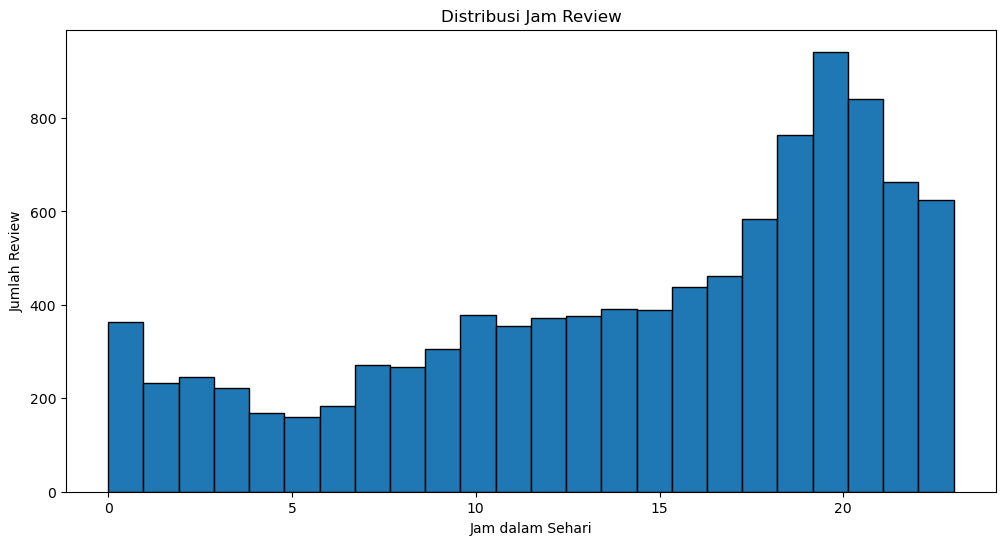

In [14]:
import matplotlib.pyplot as plt

# Membuat histogram pola jam review
plt.figure(figsize=(12, 6))
df['event_hour'].plot(kind='hist', bins=24, edgecolor='black')
plt.title('Distribusi Jam Review')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Review')
plt.show()


### Distribusi Menit Review dalam Sejam

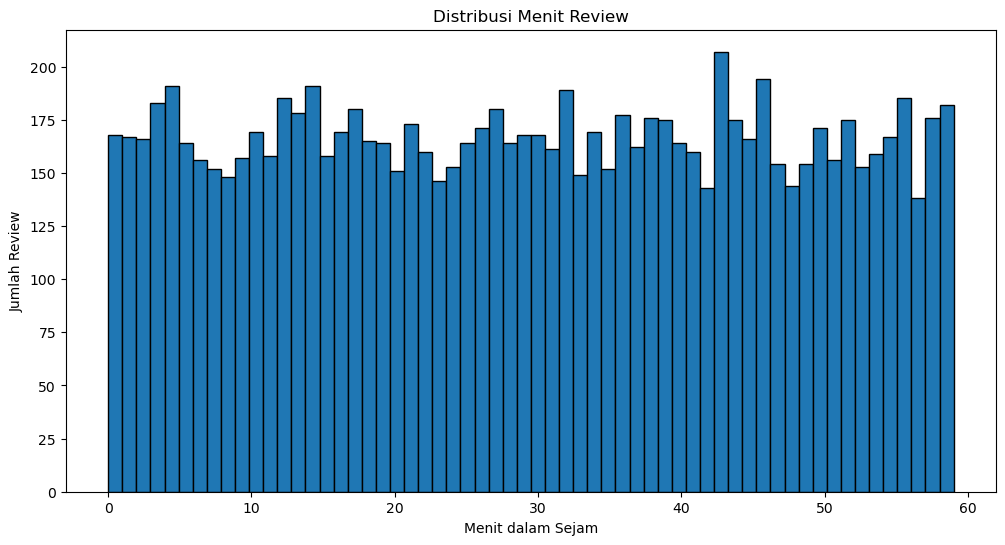

In [15]:
import matplotlib.pyplot as plt

# Membuat histogram pola menit review
plt.figure(figsize=(12, 6))
df['event_minute'].plot(kind='hist', bins=60, edgecolor='black')
plt.title('Distribusi Menit Review')
plt.xlabel('Menit dalam Sejam')
plt.ylabel('Jumlah Review')
plt.show()

## Wordcloud Sentiment Positif dan Negatif

C:\Users\hp\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


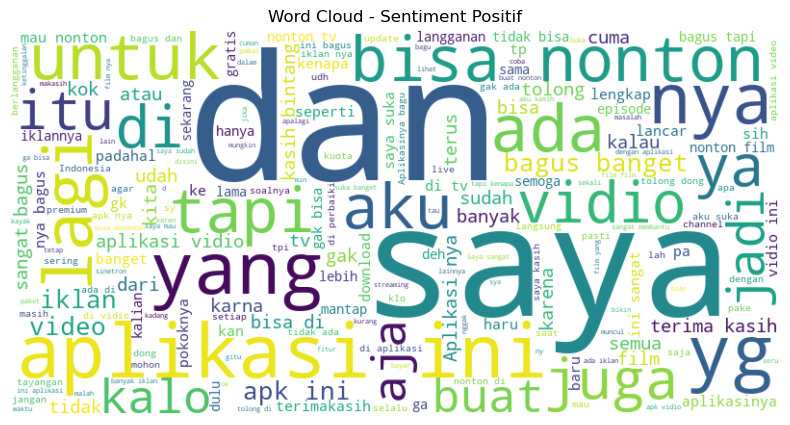

C:\Users\hp\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


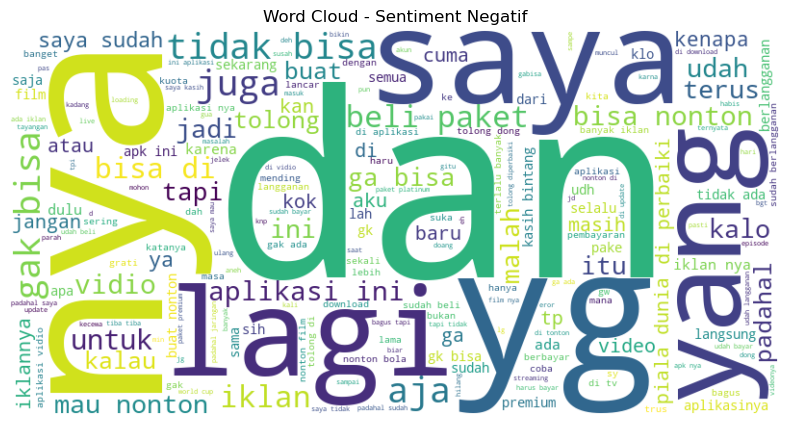

In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pilih data dengan sentiment positif
positive_reviews = df[df['sentiment'] == 'Positif']['content']

# Gabungkan semua kata dalam reviews positif
positive_text = ' '.join(positive_reviews)

# Buat Word Cloud untuk sentiment positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Tampilkan Word Cloud untuk sentiment positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiment Positif')
plt.show()

# Pilih data dengan sentiment negatif
negative_reviews = df[df['sentiment'] == 'Negatif']['content']

# Gabungkan semua kata dalam reviews negatif
negative_text = ' '.join(negative_reviews)

# Buat Word Cloud untuk sentiment negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan Word Cloud untuk sentiment negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiment Negatif')
plt.show()


### Perbandingan Sentimen Positif dan Negatif Berdasarkan Waktu

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

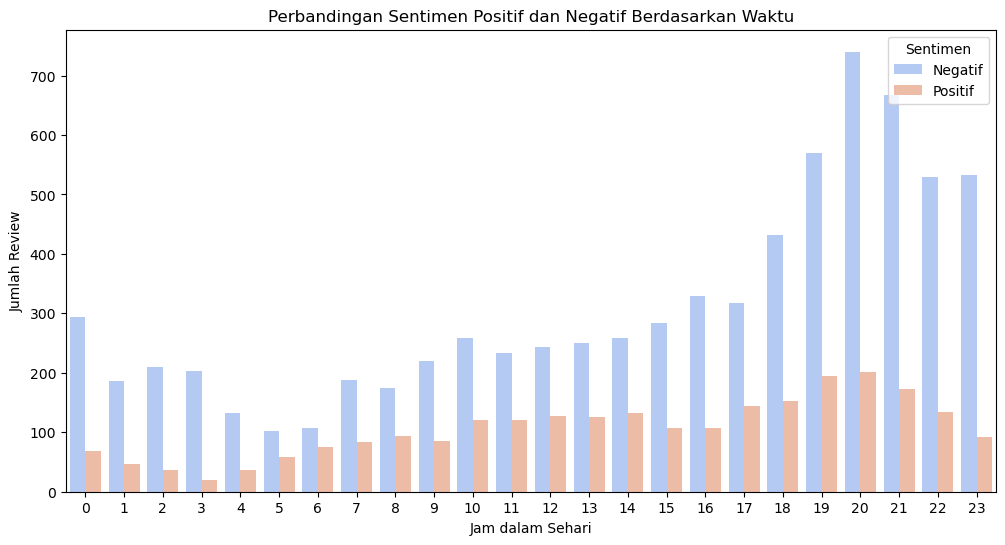

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot untuk melihat perbandingan sentimen positif dan negatif berdasarkan waktu
plt.figure(figsize=(12, 6))
sns.countplot(x='event_hour', hue='sentiment', data=df, palette='coolwarm')
plt.title('Perbandingan Sentimen Positif dan Negatif Berdasarkan Waktu')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Review')
plt.legend(title='Sentimen', loc='upper right')
plt.show()
